# Simple Classification with ByteTorch
This notebook demonstrates a simple binary classification task using ByteTorch on synthetic 2D data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from src.core.tensor import Tensor
from src.nn.linear import Linear
from src.optim.optimizers.SGD import SGD

# Generate synthetic 2D classification data
We will generate two classes of points in 2D for binary classification.

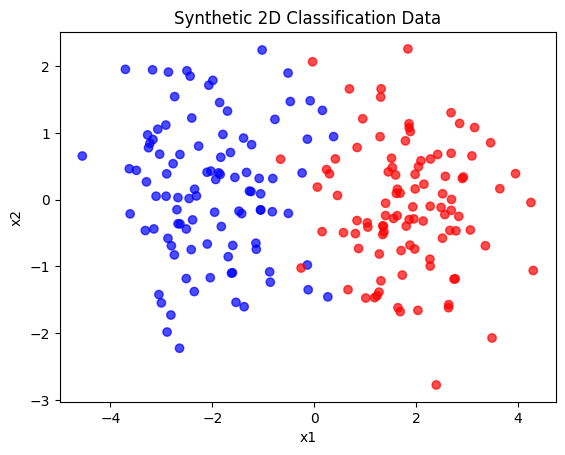

In [2]:
np.random.seed(0)
N = 100
X0 = np.random.randn(N, 2) + np.array([-2, 0])
X1 = np.random.randn(N, 2) + np.array([2, 0])
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(N), np.ones(N)])
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.7)
plt.title('Synthetic 2D Classification Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Prepare data for ByteTorch
Convert numpy arrays to ByteTorch tensors and reshape labels for binary classification.

In [3]:
X_tensor = Tensor(X, requires_grad=False)
y_tensor = Tensor(y.reshape(-1, 1), requires_grad=False)

# Build the model
We use a simple linear model (logistic regression) for binary classification.

In [4]:
model = Linear(2, 1)
optimizer = SGD(model.parameters(), lr=0.1)

# Define sigmoid and binary cross-entropy loss
We implement the sigmoid activation and BCE loss for binary classification.

In [5]:
def sigmoid(x):
    return 1 / (1 + (-x).exp())

def bce_loss(pred, target):
    # pred: logits, target: 0 or 1
    pred_sigmoid = sigmoid(pred)
    return -(target * pred_sigmoid.log() + (1 - target) * (1 - pred_sigmoid).log()).mean()

# Training loop
We train the model using binary cross-entropy loss and SGD.

In [6]:
losses = []
for epoch in range(200):
    logits = model(X_tensor)
    loss = bce_loss(logits, y_tensor)
    losses.append(loss.data.item())
    model.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 40 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.data.item():.4f}")

Epoch 40, Loss: 0.1818
Epoch 80, Loss: 0.1272
Epoch 120, Loss: 0.1088
Epoch 160, Loss: 0.0994
Epoch 200, Loss: 0.0936


# Evaluate model performance
We compute accuracy and plot the loss curve.

Accuracy: 0.96


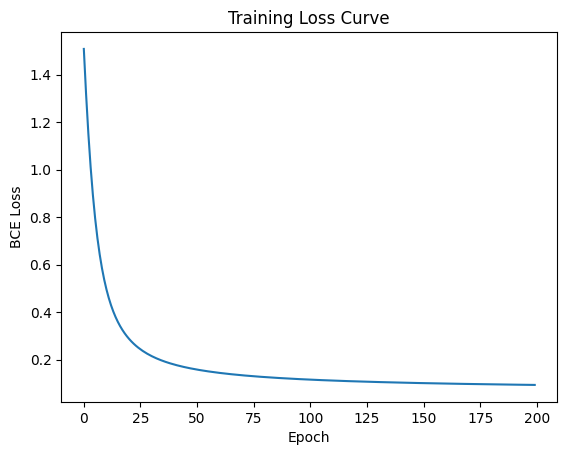

In [ ]:
# Compute predictions
with np.errstate(all='ignore'):
    probs = sigmoid(model(X_tensor)).data
preds = (probs > 0.5).astype(int)
acc = (preds == y.reshape(-1, 1)).mean()
print(f"Accuracy: {acc:.2f}")

# Plot loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.title('Training Loss Curve')
plt.show()

# Visualize decision boundary
We plot the decision boundary learned by the model.

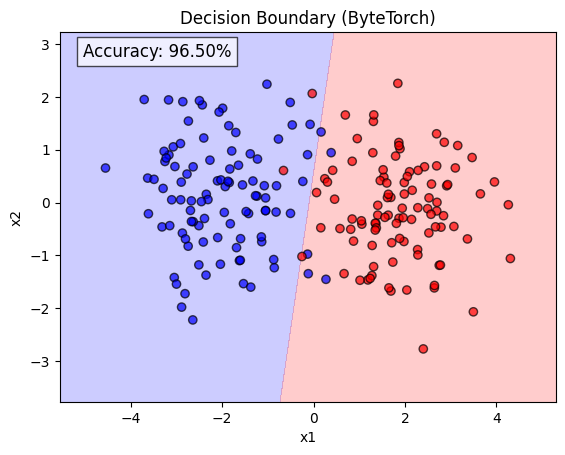

In [14]:
# Plot decision boundary
h = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = Tensor(grid, requires_grad=False)
with np.errstate(all='ignore'):
    probs_grid = sigmoid(model(grid_tensor)).data.reshape(xx.shape)
plt.contourf(xx, yy, probs_grid, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k', alpha=0.7)
plt.title('Decision Boundary (ByteTorch)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.text(x_min + 0.5, y_max - 0.5, f'Accuracy: {acc*100:.2f}%', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.show()